In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.nn.functional import cross_entropy

In [3]:
!ls data

sample_submission.csv  train_features.csv	    train_targets_scored.csv
test_features.csv      train_targets_nonscored.csv


In [4]:
train_features_df = pd.read_csv('data/train_features.csv')

In [5]:
train_features_df.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [10]:
train_features_df.cp_type.unique()

array(['trt_cp', 'ctl_vehicle'], dtype=object)

In [11]:
train_features_df.cp_time.unique()

array([24, 72, 48])

In [12]:
train_features_df.cp_dose.unique()

array(['D1', 'D2'], dtype=object)

In [7]:
print('\n'.join(train_features_df.columns))

sig_id
cp_type
cp_time
cp_dose
g-0
g-1
g-2
g-3
g-4
g-5
g-6
g-7
g-8
g-9
g-10
g-11
g-12
g-13
g-14
g-15
g-16
g-17
g-18
g-19
g-20
g-21
g-22
g-23
g-24
g-25
g-26
g-27
g-28
g-29
g-30
g-31
g-32
g-33
g-34
g-35
g-36
g-37
g-38
g-39
g-40
g-41
g-42
g-43
g-44
g-45
g-46
g-47
g-48
g-49
g-50
g-51
g-52
g-53
g-54
g-55
g-56
g-57
g-58
g-59
g-60
g-61
g-62
g-63
g-64
g-65
g-66
g-67
g-68
g-69
g-70
g-71
g-72
g-73
g-74
g-75
g-76
g-77
g-78
g-79
g-80
g-81
g-82
g-83
g-84
g-85
g-86
g-87
g-88
g-89
g-90
g-91
g-92
g-93
g-94
g-95
g-96
g-97
g-98
g-99
g-100
g-101
g-102
g-103
g-104
g-105
g-106
g-107
g-108
g-109
g-110
g-111
g-112
g-113
g-114
g-115
g-116
g-117
g-118
g-119
g-120
g-121
g-122
g-123
g-124
g-125
g-126
g-127
g-128
g-129
g-130
g-131
g-132
g-133
g-134
g-135
g-136
g-137
g-138
g-139
g-140
g-141
g-142
g-143
g-144
g-145
g-146
g-147
g-148
g-149
g-150
g-151
g-152
g-153
g-154
g-155
g-156
g-157
g-158
g-159
g-160
g-161
g-162
g-163
g-164
g-165
g-166
g-167
g-168
g-169
g-170
g-171
g-172
g-173
g-174
g-175
g-176
g-177
g-178
g-179

In [13]:
train_targets_scores = pd.read_csv('data/train_targets_scored.csv')

In [14]:
train_targets_scores.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
cols = train_targets_scores.columns.values[1:]
row = train_targets_scores.iloc[0]
sele = row.values[1:].astype(np.bool)
print(cols[sele])

['gsk_inhibitor']


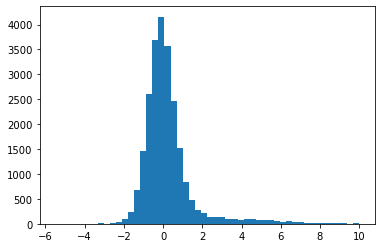

In [30]:
plt.hist(train_features_df['g-0'], 50)
plt.show()

In [62]:
y = train_targets_scores.values[:, 1:].astype(np.float32)

In [63]:
y_hat = np.zeros_like(y)

In [65]:
for i in range(len(y)):
    yi, yi_hat = y[i], y_hat[i]
    print(yi, yi_hat)
    print(yi.shape, yi_hat.shape)
    print(yi.dtype, yi_hat.dtype)
    loss = cross_entropy(yi, yi_hat)
    print(loss)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 

TypeError: Cannot cast array data from dtype('float32') to dtype('<U47') according to the rule 'safe'

In [73]:
scored_targets = train_targets_scores.columns.values[1:]
# scored_targets = [t.split('_') for t in scored_targets]
# print('\n'.join())

In [76]:
for target in scored_targets:
    a = train_targets_scores[target].values
    print(target, np.sum(a))

5-alpha_reductase_inhibitor 17
11-beta-hsd1_inhibitor 18
acat_inhibitor 24
acetylcholine_receptor_agonist 190
acetylcholine_receptor_antagonist 301
acetylcholinesterase_inhibitor 73
adenosine_receptor_agonist 54
adenosine_receptor_antagonist 96
adenylyl_cyclase_activator 12
adrenergic_receptor_agonist 270
adrenergic_receptor_antagonist 360
akt_inhibitor 66
aldehyde_dehydrogenase_inhibitor 7
alk_inhibitor 42
ampk_activator 12
analgesic 12
androgen_receptor_agonist 48
androgen_receptor_antagonist 89
anesthetic_-_local 80
angiogenesis_inhibitor 36
angiotensin_receptor_antagonist 37
anti-inflammatory 73
antiarrhythmic 6
antibiotic 43
anticonvulsant 12
antifungal 13
antihistamine 12
antimalarial 18
antioxidant 73
antiprotozoal 36
antiviral 23
apoptosis_stimulant 49
aromatase_inhibitor 47
atm_kinase_inhibitor 6
atp-sensitive_potassium_channel_antagonist 1
atp_synthase_inhibitor 12
atpase_inhibitor 97
atr_kinase_inhibitor 19
aurora_kinase_inhibitor 96
autotaxin_inhibitor 6
bacterial_30s_ribos